In [23]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

<Figure size 640x480 with 0 Axes>

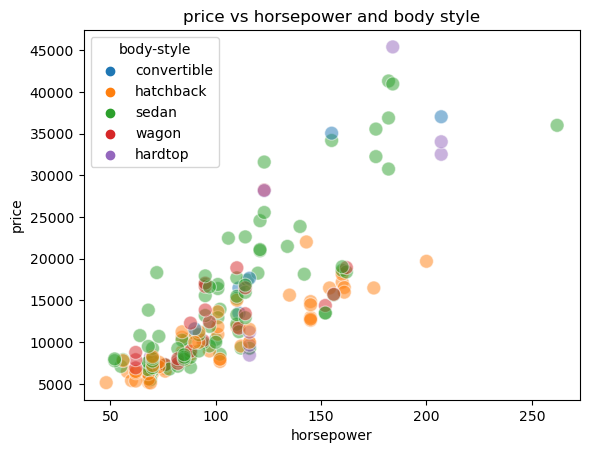

In [24]:
#Question 1 - Part 1

#import data
imports = pd.read_csv("imports-85 (1).csv")

#visualize relationship between price, horsepower, and body style

#scatterplot with price as dependent variable
plt.figure()
ax = sns.scatterplot(
    x = 'horsepower',
    y = 'price',
    data = imports,
    color = "blue",
    hue = 'body-style', 
    alpha = 0.5,
    s = 100)
ax.set(xlabel = 'horsepower', ylabel = 'price', title = 'price vs horsepower and body style')
plt.show()

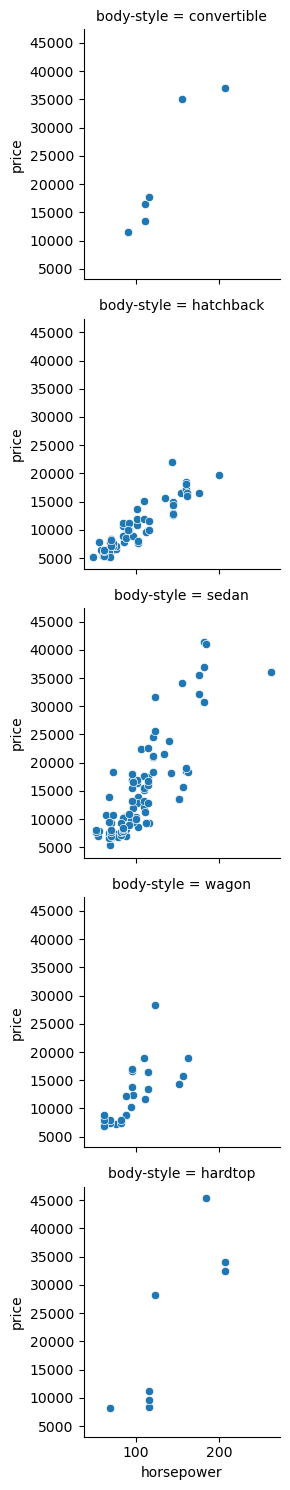

In [28]:
#individual scatterplots for each bodytype
ax = sns.FacetGrid(imports, row='body-style')
ax.map(sns.scatterplot, 'horsepower', 'price')
plt.show()

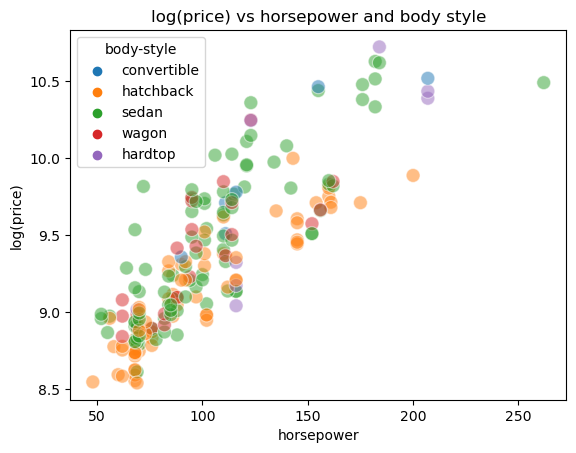

In [26]:
#Transform price into log(price) and price ^ 2
imports['log_price'] = np.log(imports['price'])
imports['squared_price'] = np.square(imports['price'])

#log(price) data visualization

#scatterplot with log(price) as dependent variable
plt.figure()
ax = sns.scatterplot(
    x = 'horsepower',
    y = 'log_price',
    data = imports,
    color = "blue",
    hue = 'body-style',
    alpha = 0.5,
    s = 100)
ax.set(xlabel = 'horsepower', ylabel = 'log(price)', title = 'log(price) vs horsepower and body style')
plt.show()

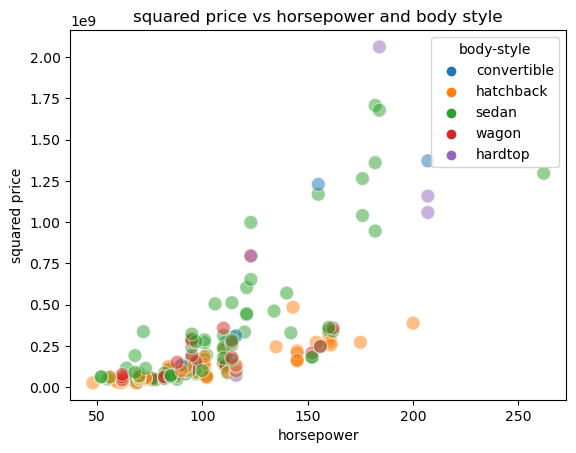

In [27]:
#price^2 data visualization

#scatterplot with price^2 as dependent variable
plt.figure()
ax = sns.scatterplot(
    x = 'horsepower',
    y = 'squared_price',
    data = imports,
    color = "blue",
    hue = 'body-style',
    alpha = 0.5,
    s = 100)
ax.set(xlabel = 'horsepower', ylabel = 'squared price', title = 'squared price vs horsepower and body style')
plt.show()

Body style appears to have little relevance for car prices once we have horsepower as an independent variable. We would not include body type when tyring to predict the price of a car.

In [30]:
#Question 1 - Part 2

#Regression dianostic plots of residuals vs. fitted and residuals vs horsepower

import statsmodels.formula.api as sm
from seaborn_qqplot import pplot
from scipy.stats import norm

#Regression
imports = imports.rename(columns={'body-style': 'bodystyle'})
res = sm.ols(formula='log_price~horsepower + bodystyle', data = imports).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     115.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           3.55e-56
Time:                        14:30:02   Log-Likelihood:                -7.6882
No. Observations:                 199   AIC:                             27.38
Df Residuals:                     193   BIC:                             47.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8

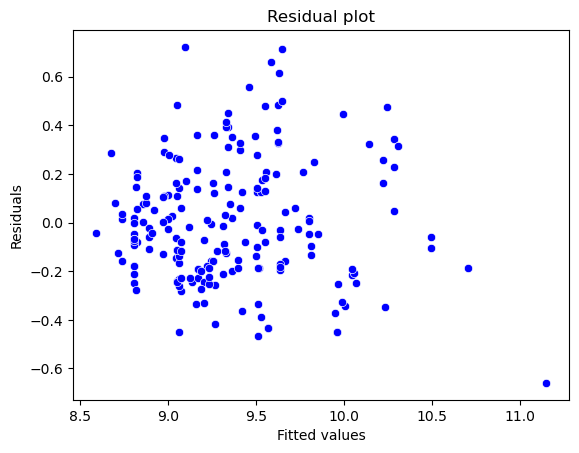

In [33]:
#Plot residuals over fitted values
plt.figure()
ax=sns.scatterplot(x = res.fittedvalues,
    y = res.resid,
    color = "blue")
ax.set(xlabel = 'Fitted values',
    ylabel = 'Residuals',
    title = 'Residual plot')
plt.show()

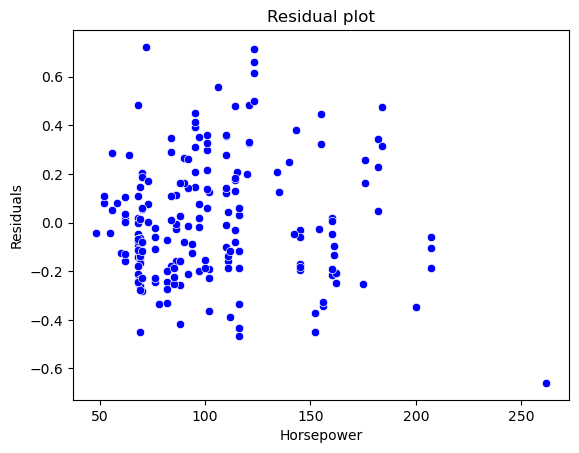

In [34]:
#Plot residuals over horsepower
plt.figure()
ax=sns.scatterplot(x = imports.horsepower,
                   y = res.resid,
                   color = "blue")
ax.set(xlabel = 'Horsepower',
       ylabel = 'Residuals',
       title = 'Residual plot')
plt.show()

A Normal probability plot of the residuals can be used to check the normality assumption. Here each residual is plotted against its expected value under normality. We can also plot the histogram of residuals. 

<Figure size 640x480 with 0 Axes>

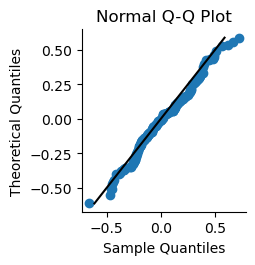

In [35]:
residuals = pd.DataFrame({'resid': res.resid})
plt.figure()
ax = pplot(data=residuals,
           x='resid',
           y=norm,
           kind='qq',
           display_kws={'identity':True})
ax.set(ylabel = 'Theoretical Quantiles',
       xlabel = 'Sample Quantiles',
       title = 'Normal Q-Q Plot')
plt.show()

/Users/johnkriston/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


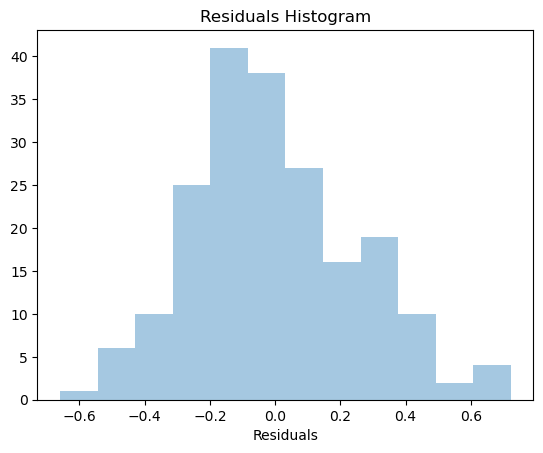

In [36]:
#Histogram of Residuals 
plt.figure()
ax = sns.distplot(residuals.resid, kde = False)
ax.set(title = 'Residuals Histogram', xlabel = 'Residuals')
plt.show()

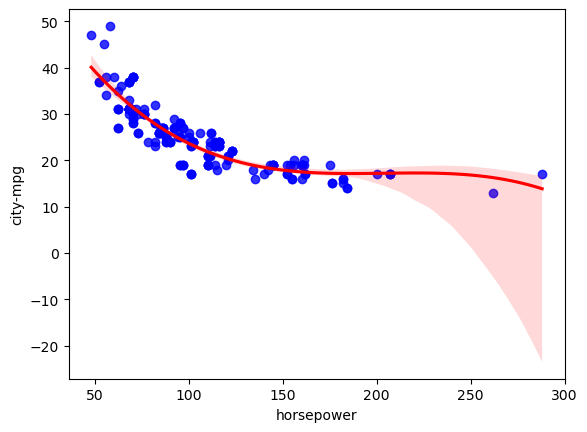

In [37]:
#Question 1 - Part 3

#Visualize relationship between fuel efficiency (city-mpg) and horsepower
plt.figure()
ax = sns.regplot(x = 'horsepower',
                 y = 'city-mpg',
                 data = imports,
                 scatter_kws={'color': 'blue'},
                 line_kws={'color': 'red'},
                 fit_reg = True,
                 order = 3)
plt.show()

In [39]:
#Regress fuel efficiency on horsepower
imports = imports.rename(columns={'city-mpg': 'citympg'})
res = sm.ols('citympg~horsepower', data = imports).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                citympg   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     366.5
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           3.49e-47
Time:                        14:58:18   Log-Likelihood:                -564.37
No. Observations:                 203   AIC:                             1133.
Df Residuals:                     201   BIC:                             1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1031      0.775     50.482      0.0

We can see that we have a strong negative relation between for low horse power cars but the relation
is almost flat at the higher end. When we run a single regression, we get too large a regression
coefficient (in absolute value) for cars at the higher end and too small a regression coefficient (in
absolute value) for cars at the lower end.